In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df_temp = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [ ]:
df['Glucose'] = df['Glucose'].replace()

In [10]:
df['Glucose'].mean()

120.89453125

In [11]:
for i in df_temp.columns:
    df[i] = df[i].replace(0,df[i].mean())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [65]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [66]:
#SMOTE

In [67]:
from imblearn.over_sampling import SMOTE
over_sampling = SMOTE()
X,y = X,y =  over_sampling.fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']],df['Outcome'])

In [41]:
from sklearn.decomposition import PCA

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
num_features = list(X.columns)

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
import seaborn as sns

<Axes: >

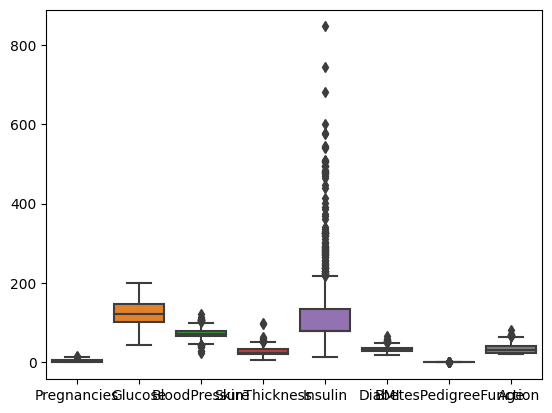

In [46]:
sns.boxplot(X)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X.shape

(1000, 8)

In [80]:
num_pipeline = Pipeline(
    steps=[
        ("SimpleImputer",SimpleImputer(strategy="median")),
        ("Scaler",StandardScaler()),
        ("PCA",PCA(n_components=2,svd_solver='full'))
    ]
)

In [81]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features)
])

In [82]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [83]:
models = {
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes':BernoulliNB()
    
}
def model_evaluation(models,X_train,X_test,y_train,y_test):
    result = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc_score = accuracy_score(y_test,y_pred) 
        result[list(models.keys())[i]] = acc_score
    return result

In [84]:
result = model_evaluation(models,X_train,X_test,y_train,y_test)

In [85]:
result

{'Random Forest': 0.706060606060606,
 'Logistic Regression': 0.7090909090909091,
 'DecisionTreeClassifier': 0.6727272727272727,
 'SVC': 0.7181818181818181,
 'KNN': 0.6666666666666666,
 'Naive Bayes': 0.693939393939394}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters = {
    "n_components": [1,2,3,4,5,6,7,8],
    "svd_solver":['auto','full','arpack','randomized']
}

In [70]:
clf = GridSearchCV(PCA(),param_grid=parameters,cv=5,verbose=1)

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
clf.fit(X_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=PCA(),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'svd_solver': ['auto', 'full', 'arpack',
                                        'randomized']},
             verbose=1)

In [75]:
clf.best_estimator_

PCA(n_components=2, svd_solver='full')